# Numerisk integrasjon.
### hhv. midtpunkt-, trapes- og Simpsons metode

Med n = 4:
(Steglengde, dx = 0.3)

  Midtpunktsmetoden = 0.9927306160806346 

  Trapesmetoden     = 1.0619121259694442 

  Simpsons metode   = 1.0218403107449554 



Kommentar:
Alle summene nærmer seg riktig verdi hvis n økes, hvorav Simpson normalt sett konvergerer raskest.


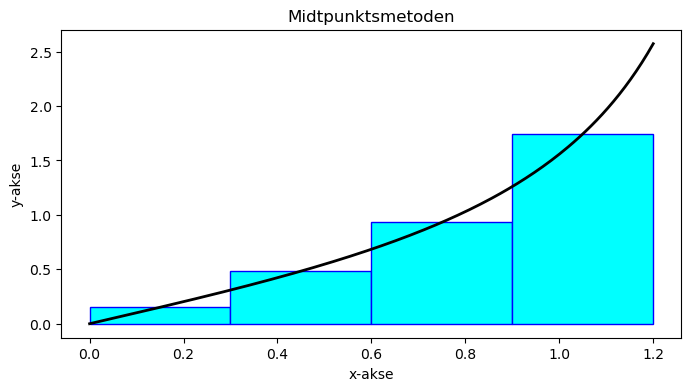

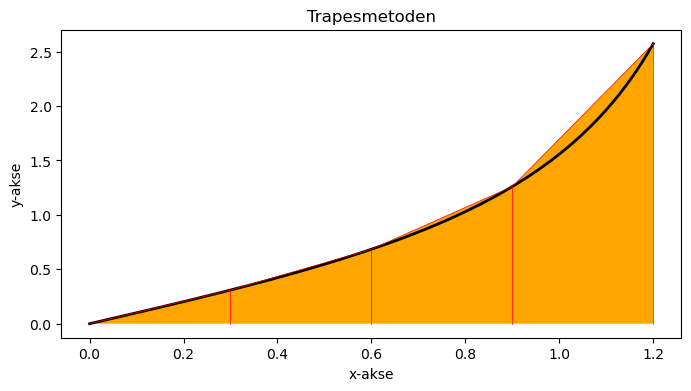

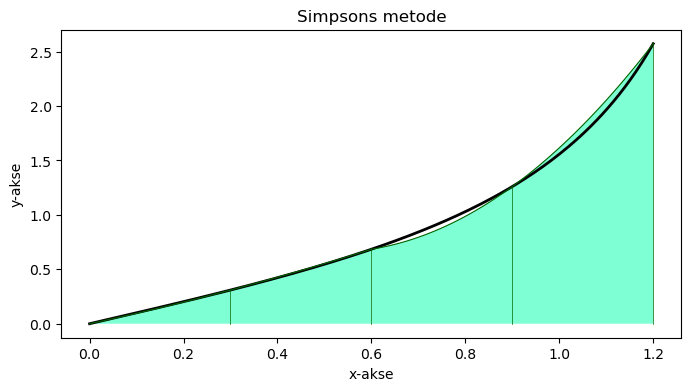

In [1]:
            # IMPORTERER PAKKER 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle



            # DEFINERER DE ULIKE METODENE:  Midtpunkt-, Trapes- og Simpsons metode

def midtpunkt(f, a, b, n):    
    x = np.linspace(a, b, n+1)      
    dx = (b - a)/n 
    ym = f(x[0:n] + dx/2) 
    ms = np.sum(ym) * dx
    return ms


def trapes(f, a, b, n):    
    x = np.linspace(a, b, n+1)      
    dx = (b - a)/n    
    ts = (f(x[0]) + 2*np.sum(f(x[1:n])) +  f(x[-1])) * dx/2   
    return ts


def simpson(f,a,b,n):
    if (n%2 != 0):         
        print("n må være et partall når vi bruker Simpsons metode.\n")
        return None           
    
    x = np.linspace(a, b, n+1)      
    dx = (b - a)/n    
    ss = (f(x[0]) + f(x[-1]) + 4*np.sum(f(x[1::2])) + 2*np.sum(f(x[2:n:2]))) * dx/3         
    return ss






            #  LEGGER INN EN VALGT FUNKSJON, OG FORETAR BEREGNINGER

f = lambda x: np.tan(x)     
a, b = 0, 1.2                        
n = 4                              


M = midtpunkt(f, a, b, n)              
T = trapes(f, a, b, n)                
S = simpson(f, a, b, n)


print(f'Med n = {n}:') 
print(f'(Steglengde, dx = {(b-a)/n})\n')
print(f"  Midtpunktsmetoden = {M} \n")  
print(f"  Trapesmetoden     = {T} \n") 
print(f"  Simpsons metode   = {S} \n")
print("\n")
print("Kommentar:")
print("Alle summene nærmer seg riktig verdi hvis n økes, hvorav Simpson normalt sett konvergerer raskest.")







            # GRAFISK ILLUSTRASJON AV DE ULIKE METODENE

x = np.linspace(a, b, n+1)
y = f(x)
dx = (b - a)/n
x_plot = np.linspace(a , b, 200)



fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(x_plot, f(x_plot),color="black",linewidth=2.0)
xm = (x[0:n] + x[1:n+1])/2

for i in range(0,n):
    ax1.add_patch(Rectangle((x[i], 0), dx , f(xm[i]), edgecolor="blue", facecolor="cyan"))

plt.xlabel("x-akse")
plt.ylabel("y-akse")
plt.title("Midtpunktsmetoden")
plt.show()



fig, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(x_plot, f(x_plot),color="black",linewidth=2.0)
ax2.plot(x, y, color="red",linewidth=0.5)
ax2.fill_between(x, y, facecolor='orange')

for i in range(0,n+1):
    plt.plot([x[i],x[i]],[0,y[i]],color="red",linewidth=0.5)

plt.xlabel("x-akse")
plt.ylabel("y-akse")
plt.title("Trapesmetoden")
plt.show()



if (n%2 != 0):         
    print('')  
else:
    fig, ax3 = plt.subplots(figsize=(8,4))
    ax3.plot(x_plot, f(x_plot),color="black",linewidth=2.0)

    for i in range(0,n,2):
        x_parabel = np.linspace(x[i],x[i+2])
        A = (y[i] - 2*y[i+1] + y[i+2]) / (2*dx**2)
        B = ((-3*y[i] + 4*y[i+1] - y[i+2])*dx - 2*x[i]*(y[i] - 2*y[i+1] + y[i+2])) / (2*dx**2)
        C = x[i]**2*(y[i] - 2*y[i+1] + y[i+2]) + 3*dx*x[i]*(y[i] - 4*y[i+1]/3 + y[i+2]/3) + 2*dx**2*y[i]
        C *= 1/(2*dx**2)
        parabel = A*x_parabel**2 + B*x_parabel + C
        plt.plot(x_parabel,parabel,color='darkgreen',linewidth=0.8)
        ax3.fill_between(x_parabel, parabel, facecolor='aquamarine')
        plt.plot([x[i],x[i]],[0,y[i]],[x[i+1],x[i+1]],[0,y[i+1]],color='darkgreen',linewidth=0.5)

    plt.plot([x[-1],x[-1]],[0,y[-1]],color='darkgreen',linewidth=0.5)
    plt.xlabel("x-akse")
    plt.ylabel("y-akse")
    plt.title("Simpsons metode")
    plt.show()